### Cross Validation Model Evaluation
```
FileName: CVME_v2.ipynb
CreationDate: 19-Jul-2018
Description: Cross Validation Model Evaluation
Runtime: 1/2 hour for 25x2 soungs 12 sec each
Version:
        v1: 19-Jul-2018: Initial Creation
        v2: 19-Jul-2018: Bringing in Songs Data
```

In [1]:
# Load libraries 
# from sklearn import datasets 
from sklearn import metrics 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import datetime

In [2]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-19 11:34:32


In [3]:
# Load digits dataset 
# digits = datasets.load_digits()

In [24]:
# Setup parameters
fileNameNoPrefix = "Librosa120SecCSVExtract25Test" # Train
testFileNameNoPrefix = "Librosa10SecCSVExtract2" # Test

In [5]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [6]:
x_data = df.drop('label',axis=1)
x_data.shape

(254059, 577)

In [7]:
y_data = df["label"].values
y_data.shape

(254059,)

In [8]:
features = x_data
target = y_data

In [9]:
# Create features matrix 
# features = digits.data

In [10]:
# Create target vector 
# target = digits.target

In [11]:
# Create standardizer 
standardizer = StandardScaler()

In [12]:
# Create logistic regression object 
logit = LogisticRegression()

In [13]:
# Create a pipeline that standardizes, then runs logistic regression 
pipeline = make_pipeline(standardizer, logit)

In [14]:
# Create k-Fold cross-validation 
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [15]:
# Conduct k-fold cross-validation 
cv_results = cross_val_score( pipeline, # Pipeline 
                              features, # Feature matrix 
                              target,   # Target vector 
                              cv=kf,    # Cross-validation technique
                              scoring="accuracy", # Loss function 
                              n_jobs=-1) # Use all CPU scores

In [16]:
# Calculate mean 
cv_results.mean()

0.9898684913005702

In [21]:
cv_results

array([0.99055341, 0.99075022, 0.99035661, 0.98921515, 0.98925451,
       0.99071086, 0.98893962, 0.99067149, 0.98933323, 0.98889982])

## Prediction for Test songs

In [25]:
dfTest = pd.read_csv(filepath_or_buffer=(testFileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
dfTest.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [26]:
x_dataTest = dfTest.drop('label',axis=1)
x_dataTest.shape

(1724, 577)

In [27]:
y_dataTest = dfTest["label"].values
y_dataTest.shape

(1724,)

In [55]:
featuresTest = standardizer.fit_transform(x_dataTest)
targetTest = (y_dataTest)

In [56]:
y_pred = pipeline.predict(featuresTest)

In [57]:
y_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [59]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_pred,targetTest))

             precision    recall  f1-score   support

        0.0       0.56      0.53      0.54       914
        1.0       0.50      0.53      0.52       810

avg / total       0.53      0.53      0.53      1724



## Visualize the data

In [17]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


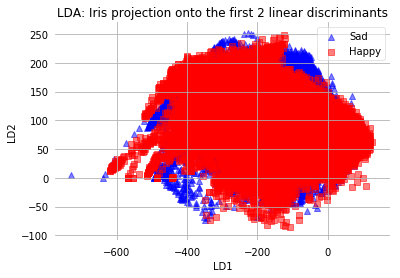

In [18]:
plot_step_lda(features.as_matrix(columns=None), target)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


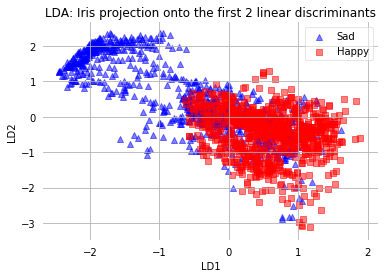

In [64]:
plot_step_lda(featuresTest, targetTest)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


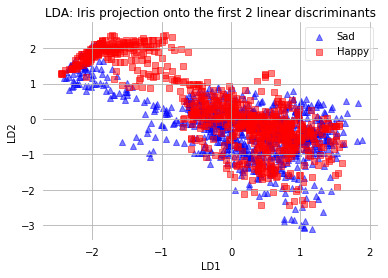

In [65]:
plot_step_lda(featuresTest, y_pred)

In [19]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-19 12:14:36
